<a href="https://colab.research.google.com/github/dataSci-rigo/opencv/blob/master/firstname_lastname_p1_rodrigo_luna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [0]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [133]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

(70000, 784)


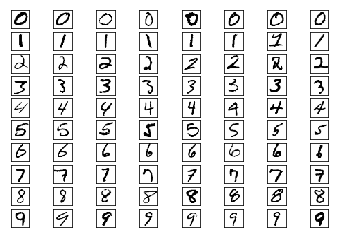

In [250]:

print(X.shape)

def P1(num_examples=10):
  
### STUDENT START ###
  #for each of the ten integers
  #convert each to a string
  #Find the index in Y that equals that string
  #Use the Y index to index X, and num_exampls
  x_new=np.array([X[Y==str(i)][0:num_examples] for i in range(10)],dtype=float)
  plt.rc("image", cmap="Greys")
  for i in range(10):
    for k in range (num_examples):
      plt.subplot(10,num_examples,i*num_examples+k+1)
      #Remove x and y ticks to may the plots look cleaner
      plt.xticks([])
      plt.yticks([])
      #plt.imshow(x_new[i][k].reshape(28,28),cmap='Greys',  interpolation='nearest')
      plt.imshow(x_new[i,k].reshape(28,28),  interpolation='nearest')

### STUDENT END ###

P1(8)

###plt.rc(c="") ###this causes me problems by the way

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [211]:
def P2(k_values):

### STUDENT START ###
  accuracy=[]
  for k in k_values[::-1]:
    simple=KNeighborsClassifier(n_neighbors=k,algorithm='auto')
    simple.fit(mini_train_data, mini_train_labels)
    dev_predict=simple.predict(dev_data)
    stuff=[str(i) for i in range(0,10)]
    output=classification_report(dev_labels, dev_predict, target_names=stuff,output_dict=True)
    accuracy.append(output.get('macro avg').get('precision'))
    #print(k, output.get('macro avg').get('precision'))
  print(classification_report(dev_labels, dev_predict, target_names=stuff,output_dict=False))
  return [k_values,accuracy[::-1]]
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       104
           1       0.85      0.97      0.91       114
           2       0.93      0.84      0.88        97
           3       0.88      0.81      0.84       106
           4       0.89      0.87      0.88       100
           5       0.82      0.90      0.86        92
           6       0.95      0.95      0.95        99
           7       0.84      0.87      0.85        97
           8       0.90      0.80      0.85        93
           9       0.81      0.81      0.81        98

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



[[9, 7, 5, 3, 1],
 [0.8785913210603651,
  0.8813069569588332,
  0.8882606881124617,
  0.8814104405659009,
  0.875616895936872]]

ANSWER:  The most difficult digit is "9," followed by "5"

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [0]:
def P3(train_sizes, accuracies):
  stuff=[str(i) for i in range(0,10)]
  delta_times=[]
### STUDENT START ###
  for train_size in train_sizes:
    start_time=time.time()  
    simple=KNeighborsClassifier(n_neighbors=1,algorithm='auto')
    simple.fit(train_data[:train_size], train_labels[:train_size])
    dev_predict=simple.predict(dev_data)
    
    output=classification_report(dev_labels, dev_predict, target_names=stuff,output_dict=True).get('macro avg').get('precision')
    accuracies.append(output)
    delta_time=time.time()-start_time
    delta_times.append(delta_time)
    print("calculation time for training set of size: "+str(train_size)+" is "+str(delta_time)+" and a precision of "+str(output))
  print(delta_times)
  return accuracies
  

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
#train_sizes = [100, 200, 400, 800]
accuracies = []
P3(train_sizes, accuracies)

calculation time for training set of size: 100 is 0.184540987015 and a precision of 0.718473258727
calculation time for training set of size: 200 is 0.353307962418 and a precision of 0.795929038433
calculation time for training set of size: 400 is 0.655498027802 and a precision of 0.812840763894
calculation time for training set of size: 800 is 1.29914903641 and a precision of 0.866121225649
calculation time for training set of size: 1600 is 2.59640407562 and a precision of 0.905074225623
calculation time for training set of size: 3200 is 5.72828888893 and a precision of 0.925764362215
calculation time for training set of size: 6400 is 11.7166249752 and a precision of 0.938254125388
calculation time for training set of size: 12800 is 24.1417160034 and a precision of 0.951121541396
calculation time for training set of size: 25000 is 49.8117601871 and a precision of 0.962094437725
[0.1845409870147705, 0.35330796241760254, 0.6554980278015137, 1.2991490364074707, 2.5964040756225586, 5.7282

[0.7184732587267842,
 0.7959290384326463,
 0.8128407638941573,
 0.8661212256485935,
 0.905074225622861,
 0.9257643622153109,
 0.9382541253884276,
 0.9511215413960213,
 0.9620944377254826]

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [203]:

def P4():
  train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
  accuracies=[0.7184732587267842,
 0.7959290384326463,
 0.8128407638941573,
 0.8661212256485935,
 0.905074225622861,
 0.9257643622153109,
 0.9382541253884276,
 0.9511215413960213,
 0.9620944377254826]
### STUDENT START ###
  def expo(x):
    return 2**(-x/1800)
  new_X2=np.log(train_sizes)
  #print np.e**-1
  new_X=[[expo(train_size)] for train_size in train_sizes]
  #print train_sizes
  #print new_X
  accuracies2= np.log(accuracies)
  #reg = LinearRegression().fit(new_X2.reshape(-1, 1), accuracies2)
  reg = LinearRegression().fit(new_X, accuracies2)
  #print reg.score(new_X, accuracies)
  #print reg.coef_
  #print reg.intercept_
  validation=[100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000,60000]
  return np.e**(reg.predict([[expo(val)] for val in validation])) 

### STUDENT END ###

P4()

[100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
[[0.5], [0.5], [0.5], [0.5], [0.5], [0.25], [0.0625], [0.00390625], [6.103515625e-05]]


array([0.8203036 , 0.8203036 , 0.8203036 , 0.8203036 , 0.8203036 ,
       0.88925916, 0.9447538 , 0.96279619, 0.9639922 , 0.96401119])

ANSWER: The linear model predicts accuracy that exceeds 100%. I transformed the training set into a negative exponential then applied trained the linear regression on that transformation. Since the data doubles in size I made the exponent 2. I transformed the accuracies with a log fucntion.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[103   0   0   0   0   0   1   0   0   0]
 [  0 112   0   0   1   0   1   0   0   0]
 [  0   3  86   2   0   1   2   3   0   0]
 [  0   1   3  97   0   1   0   2   0   2]
 [  0   0   0   0  96   0   0   0   0   4]
 [  1   0   0   1   0  89   0   0   1   0]
 [  1   0   0   0   0   0  98   0   0   0]
 [  1   2   0   0   2   0   0  91   0   1]
 [  0   2   4   1   1   4   0   1  80   0]
 [  1   0   1   2   4   0   1   2   0  87]]


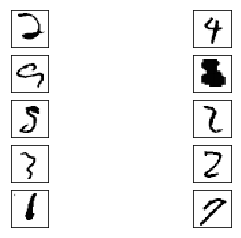

In [219]:
#def P5():

### STUDENT START ###
  simple=KNeighborsClassifier(n_neighbors=1,algorithm='auto')
  simple.fit(train_data[:6400],train_labels[:6400])
  dev_predict=simple.predict(dev_data)
  stuff=[str(i) for i in range(0,10)]
  print confusion_matrix(dev_labels, dev_predict, labels=stuff )
  #print confusion_matrix(dev_labels, dev_predict, labels=stuff ).ravel()
  num=[9,8,4,7]
  num_examples=10
  mistakes=np.array(dev_data[dev_labels!=dev_predict],dtype=float)
  for k in range (num_examples):
    plt.subplot(5,2,k+1)
    #Remove x and y ticks to may the plots look cleaner
    plt.xticks([])
    plt.yticks([])
    plt.imshow(mistakes[k].reshape(28,28),  interpolation='nearest')
 ###print a few example mistakes!   
### STUDENT END ###

#P5()


In [0]:
```
def P5():

### STUDENT START ###
 simple=KNeighborsClassifier(n_neighbors=1,algorithm='auto')
 simple.fit(dev_data,dev_labels)
 dev_predict=simple.predict(dev_data)
 stuff=[str(i) for i in range(0,10)]
 print confusion_matrix(dev_labels, dev_predict, labels=stuff )
 ###print a few example mistakes!   
### STUDENT END ###

P5()
```

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

0.822693785002
0.939634483969
0.913758639012
0.936152072499
0.879138339571


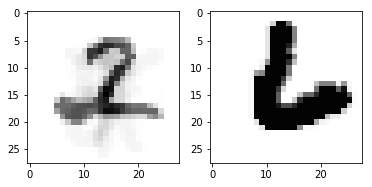

In [226]:
def P6():
    
### STUDENT START ###
  kernal=[[0.01, 0.08, 0.01],[0.08, 0.64, 0.08],[0.01, 0.08, 0.01]]

  def filt(pix):
    return pix>754 or pix<28 or pix%28==0 or pix%28==27
  def kernx(img,pix):
    return np.sum(kernal*np.array((img[pix-29:pix-26],img[pix-1:pix+2],img[pix+27:pix+30])))
  def kernal_iter(img):
    return (img[pix] if filt(pix) else kernx(img,pix) for pix in range(len(img))) 
  def img_blur(img):
    return np.fromiter(kernal_iter(img),float, count=len(img))
  def data_blur_all(arr):
    return np.apply_along_axis(img_blur, 0, np.copy(arr))
  x_train=np.apply_along_axis(img_blur, 0, np.copy(train_data))

  x_dev=np.apply_along_axis(img_blur, 0, np.copy(dev_data))
  #print x_dev.shape
  plt.subplot(1,2,1)
  plt.imshow(x_dev[3].reshape(28,28),  interpolation='nearest')
  plt.subplot(1,2,2)
  plt.imshow(dev_data[3].reshape(28,28),  interpolation='nearest')
  image_numbs = BernoulliNB(alpha=0.01, binarize=0.5, class_prior=None, fit_prior=True)
  stuff=[str(i) for i in range(0,10)]
  image_numbs.fit(x_train, train_labels)
  pred=image_numbs.predict(x_dev)
  output = classification_report(dev_labels,pred, target_names=stuff,output_dict=True)
  print output.get('macro avg').get('precision')
  blur_estimator=KNeighborsClassifier(n_neighbors=1,algorithm='auto')
  simple=KNeighborsClassifier(n_neighbors=1,algorithm='auto')
  blur_estimator.fit(x_train[:6400], train_labels[:6400])
  simple.fit(train_data[:6400], train_labels[:6400])
  dev_predict1=simple.predict(dev_data)
  dev_predict2=simple.predict(x_dev)
  dev_predict3=blur_estimator.predict(dev_data)
  dev_predict4=blur_estimator.predict(x_dev)

  print classification_report(dev_labels, dev_predict1, target_names=stuff,output_dict=True).get('macro avg').get('precision')
  print classification_report(dev_labels, dev_predict2, target_names=stuff,output_dict=True).get('macro avg').get('precision')
  print classification_report(dev_labels, dev_predict3, target_names=stuff,output_dict=True).get('macro avg').get('precision')
  print classification_report(dev_labels, dev_predict4, target_names=stuff,output_dict=True).get('macro avg').get('precision')

### STUDENT END ###

P6()

1 loop, best of 3: 833 ms per loop
10 loops, best of 3: 25.5 ms per loop
(60000, 784)


'```\ndef img_blur(img):\n  for pix in img:\n    if pix>754 or pix<28 or pix%28==0 or pix%28==27:\n      return img[pix]\n    else:\n      return np.sum(kernal*np.copy(np.array(img[pix-29:pix-26],img[pix-1:pix+2],img[pix+27:pix+30])))\ndef kern2(img,pix):\n  return(np.sum(kernal*np.copy(img.reshape((28,28))[pix%28-1:pix%28+2,pix/28-1:pix/28+2])))\ndef kern3(img,pix):\n  return(np.sum(kernal*np.copy(img.reshape((28,28))[pix%28-1:pix%28+2,pix/28-1:pix/28+2])))\n                \ndef img_blur1(img):                \n  #filter_iter=np.nonzero(img<754 and img>28 and img%28!=0 and img%28!=27)\n  print np.array(np.nonzero(img<754)).shape\n  #print fliter_iter.shape\nimg_blur1(x[1])\n```'

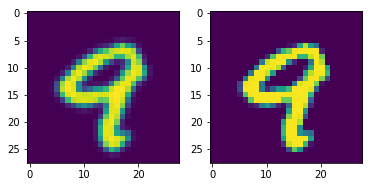

In [118]:





print x_train.shape
'''```
  kernal=[[0.01, 0.08, 0.01],[0.08, 0.64, 0.08],[0.01, 0.08, 0.01]]
  #pixel=(0,0)
  
  #proc=np.copy(dev_data[1]).reshape((28,28))
  #numpy.fromiter((<some_func>(x) for x in <something>),<dtype>,<size of something>)
  #def numb_image(image):
  #  return lambda pix: 
  #np.apply_along_axis(numb_image())
 
  def img_blur(image):
    proc=np.copy(image).reshape((28,28))
    out=np.zeros((28,28),dtype=float)
    for i in range(1,27):
      for k in range(1,27):
        out[i][k]=np.sum(kernal*np.copy(proc[i-1:i+2,k-1:k+2]))
    return out
  def set_blur(data):
    print data.shape[0]
    
    #return np.fromiter((img_blur(data[i,]) for i in range(data.shape[0])), dtype=float)
    return np.fromiter(img_blur, dtype=float)
  plt.subplot(1,2,1)
  plt.imshow(img_blur(dev_data[3]),  interpolation='nearest')
  plt.subplot(1,2,2)
  plt.imshow(dev_data[3].reshape(28,28),  interpolation='nearest')
  blur_test_data=set_blur(test_data)
  blur_dev_data=set_blut(dev_data)
def img_blur(img):
  for pix in img:
    if pix>754 or pix<28 or pix%28==0 or pix%28==27:
      return img[pix]
    else:
      return np.sum(kernal*np.copy(np.array(img[pix-29:pix-26],img[pix-1:pix+2],img[pix+27:pix+30])))
def kern2(img,pix):
  return(np.sum(kernal*np.copy(img.reshape((28,28))[pix%28-1:pix%28+2,pix/28-1:pix/28+2])))
def kern3(img,pix):
  return(np.sum(kernal*np.copy(img.reshape((28,28))[pix%28-1:pix%28+2,pix/28-1:pix/28+2])))
                
def img_blur1(img):                
  #filter_iter=np.nonzero(img<754 and img>28 and img%28!=0 and img%28!=27)
  print np.array(np.nonzero(img<754)).shape
  #print fliter_iter.shape
img_blur1(x[1])
```'''

In [114]:
x_train.shape

(60000, 784)

ANSWER: bluring the training data, seem to have no effect. However, bluring the test/predict data has a negative effect.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

(60000, 784)
1.0


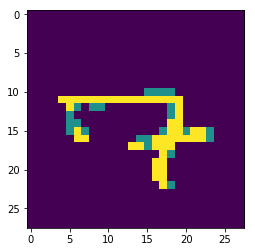

In [102]:
print(train_data.shape)
print(np.amax(X))
def digitize(data, bits):
  return np.digitize(data, [bit/float(bits) for bit in range(1, bits)])
MNB_data=digitize(train_data, 3)
#print MNB_data[4][280:500]
#print train_data[4][280:500]
#MNB_data=np.array([np.array([0 if MNB< .333 else 1 if MNB <.666 else 2 for MNB in MNB_img]) for MNB_img in train_data],dtype=int)
MNB_data= MNB_data / 2.0
plt.imshow(MNB_data[4].reshape(28,28),  interpolation='nearest')

In [247]:


 
#def P7():

### STUDENT START ###
#BernoulliNB(alpha=1.0, binarize=0.5, fit_prior=True, class_prior=None)[source]
image_numbs = BernoulliNB(alpha=1.0, binarize=0.50, class_prior=None, fit_prior=True)
stuff=[str(i) for i in range(0,10)]
image_numbs.fit(train_data, train_labels)

res=image_numbs.predict(dev_data)
output = classification_report(dev_labels, res, target_names=stuff,output_dict=True)
print output.get('macro avg').get('precision')
#class sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

multi_image_numbs=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
multi_image_numbs.fit(MNB_data, train_labels)

res2=multi_image_numbs.predict(dev_data)
output2 = classification_report(dev_labels, res2, target_names=stuff,output_dict=True)
print output2.get('macro avg').get('precision')

    
### STUDENT END ###

#P7()

0.825012822469
0.812551719694


ANSWER: The Multinomial naive bayes does not improve results. This is likely because the images already have high contrast and adding bits to each pixel does not add information. I checked the binariazation, changing it from0.5 to 0.8, it also did not improve detection. Chaning the binariztion did not change detection much until we get to the extremes.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [0]:
#alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
def P8(alphas):

### STUDENT START ###
  #class sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, iid=’warn’, refit=True, cv=’warn’, verbose=0, pre_dispatch=‘2*n_jobs’, error_score=’raise-deprecating’, return_train_score=False)
  estimator= BernoulliNB( binarize=0.5,class_prior=None, fit_prior=True)
  stuff=[str(i) for i in range(0,10)]

  gridSearch = GridSearchCV(estimator, param_grid=alphas, cv=3)
  #gridSearch.fit(dev_data, dev_labels)
  gridSearchfit=gridSearch.fit(train_data, train_labels)
  return gridSearch

  
### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

In [260]:
image_numbs = BernoulliNB(alpha=0.0, binarize=0.50, class_prior=None, fit_prior=True)
stuff=[str(i) for i in range(0,10)]
image_numbs.fit(train_data, train_labels)

res=image_numbs.predict(dev_data)
output = classification_report(dev_labels, res, target_names=stuff,output_dict=True)
print output.get('macro avg').get('precision')
print nb.best_params_
print nb.best_score_

0.826391795999
{'alpha': 0.0}
0.8374833333333334


ANSWER: The accuracy as I've been measuring it, has been 0.826 which is slightly better than 0.825 that I got previously. Alpha 0 is supposedly the best alpha. The reason the alpha value doesn't matter is because, our data is curated and close to evenly distributed.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [0]:
#def P9():

### STUDENT END ###
#class sklearn.naive_bayes.GaussianNB(priors=None, var_smoothing=1e-09)
###I changed var smoothing.
gaussNB = GaussianNB(priors=None, var_smoothing=1e-1)
stuff=[str(i) for i in range(0,10)]
gaussNB.fit(train_data, train_labels)
res=gaussNB.predict(dev_data)
output = classification_report(dev_labels, res, target_names=stuff,output_dict=True)
print output.get('macro avg').get('precision')
### STUDENT END ###
##take a look at theat  and sigma
#gnb = P9()

ANSWER: I changed the variable smoothing. It seem that the less smoothing of any kind the better. High contrast is need for Naive baysian.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

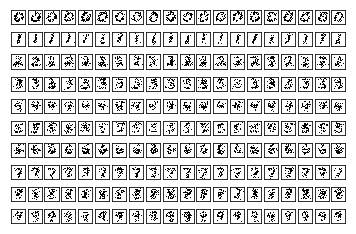

In [0]:
def P10(num_examples):

### STUDENT START ###
  image_numbs = BernoulliNB(alpha=0.001, binarize=0.5, class_prior=None, fit_prior=True)
  image_numbs.fit(train_data, train_labels)
  #print image_numbs.feature_log_prob_.shape
  #rand_numb=np.random.rand(10,784)

  generated=np.exp(image_numbs.feature_log_prob_)

  
  def P2(num_examples, estimator):
    rand_numb=np.random.binomial(1,np.array([generated for i in range(num_examples)]))
    #plt.rc("image", cmap="Greys")
    for i in range(10):
      for k in range (num_examples):
        plt.subplot(10,num_examples,i*num_examples+k+1)
        #Remove x and y ticks to may the plots look cleaner
        plt.xticks([])
        plt.yticks([])
        #plt.imshow(x_new[i][k].reshape(28,28),cmap='Greys',  interpolation='nearest')
        plt.imshow(rand_numb[k][i].reshape(28,28),  interpolation='nearest')
  P2(num_examples, generated)
#plt.imshow(rand_numb[i].reshape(28,28),  interpolation='nearest')  


### STUDENT END ###

P10(20)

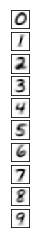

In [0]:
def P2(num_examples):
   
    plt.rc("image", cmap="Greys")
    for i in range(10):
        plt.subplot(10,num_examples,i*num_examples+1)
        #Remove x and y ticks to may the plots look cleaner
        plt.xticks([])
        plt.yticks([])
        #plt.imshow(x_new[i][k].reshape(28,28),cmap='Greys',  interpolation='nearest')
        plt.imshow(generated[i].reshape(28,28),  interpolation='nearest')
P2(1)

ANSWER: They are terrible. Most of them are not human readable. Luckily we already have an efficient way to generate numbers, we can use fonts.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [0]:
def P11(buckets, correct, total):
    
### STUDENT START ###

  image_numbs = BernoulliNB(alpha=0.001, binarize=0.5, class_prior=None, fit_prior=True)
  stuff=[str(i) for i in range(0,10)]
  image_numbs.fit(train_data, train_labels)
  #print image_numbs.class_count_
  #print  image_numbs.feature_count_
  #print  image_numbs.feature_log_prob_ 
  #print  np.exp(image_numbs.class_log_prior_)
  res=image_numbs.predict(dev_data)
  predicted_prob=image_numbs.predict_proba(dev_data)
  out_buckets=np.digitize(np.max(predicted_prob, axis=1), buckets) 
 
  correct[:]=np.unique(out_buckets[res==dev_labels] , return_counts=True)[1]
  #correct[:]=np.unique(np.array([out_buckets[k] if res[k]==dev_labels[k] else 0 for k in range(len(res))]), return_counts=True)[1][1:]
  total[:]=np.unique(out_buckets, return_counts=True)[1].astype(dtype=float)
  print total
  print correct
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)
sum (correct)/sum(total)

[30.0, 93.0, 75.0, 63.0, 70.0, 73.0, 67.0, 23.0, 506.0]
[12, 38, 47, 49, 54, 60, 62, 21, 485]
p(pred) <= 0.5000000000000    total =  30    accuracy = 0.400
p(pred) <= 0.9000000000000    total =  93    accuracy = 0.409
p(pred) <= 0.9990000000000    total =  75    accuracy = 0.627
p(pred) <= 0.9999900000000    total =  63    accuracy = 0.778
p(pred) <= 0.9999999000000    total =  70    accuracy = 0.771
p(pred) <= 0.9999999990000    total =  73    accuracy = 0.822
p(pred) <= 0.9999999999900    total =  67    accuracy = 0.925
p(pred) <= 0.9999999999999    total =  23    accuracy = 0.913
p(pred) <= 1.0000000000000    total = 506    accuracy = 0.958


0.828

**ANSWER**: The NB estimator, clearly over estimates it's own predictions by a significant margin. For example for prediction value below 90% but above 50% the NB estimator guess correctly 41% of the time. This is only slightly better than predictions for prediction values below 50%. This does not change much for prediction balues of 99% where only 62% are correct. 

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [224]:
#def P12():

### STUDENT START ###
#start=np.zeros((dev_data.shape[0],28*2))
#iter_concat=[np.concatenate(x,np.sum(x.reshape(28,28),axis=0),np.sum(x.reshape(28,28),axis=1)) for x in dev_data]

#[x[i] if i<28*28 else  for   ]
#print 
#print np.concatenate(np.sum(x.reshape(28,28),axis=0).reshape(1,28), np.sum(x.reshape(28,28),axis=1).reshape(1,28))
#x_rows= np.array([np.sum(x[i].reshape(28,28),axis=0).flatten() for i in range(x.shape[0])])
#x_cols=np.array([np.sum(x[i].reshape(28,28),axis=1).flatten() for i in range(x.shape[0])])
#print np.concatenate((x_rows, x_cols), axis=1).shape

#iter= np.concatenate(x,sum(x.reshape(28,28),axis=0),sum(x.reshape(28,28),axis=1))
#print np.fromiter(iter_concat).shape
kernal=[[0.01, 0.08, 0.01],[0.08, 0.64, 0.08],[0.01, 0.08, 0.01]]
def digitize(data, bits):
  return np.digitize(data, [bit/float(bits) for bit in range(1, bits)])

#MNB_data= MNB_data / 2.0
#plt.imshow(MNB_data[4].reshape(28,28),  interpolation='nearest')
def filt(pix):
  return pix>754 or pix<28 or pix%28==0 or pix%28==27
def kernx(img,pix):
  return np.sum(kernal*np.array((img[pix-29:pix-26],img[pix-1:pix+2],img[pix+27:pix+30])))
def kernal_iter(img):
  return (img[pix] if filt(pix) else kernx(img,pix) for pix in range(len(img))) 
def img_blur(img):
  return np.fromiter(kernal_iter(img),float, count=len(img))
def data_blur_all(arr):
  return np.apply_along_axis(img_blur, 0, np.copy(arr))
#x_train=np.apply_along_axis(img_blur, 0, np.copy(train_data))
def sum_arr(x,axis):
  array=np.sum(x.reshape(28,28),axis=axis).flatten()
  return array
def concat(x):
  return np.concatenate((x,sum_arr(x,1),sum_arr(x,1)) )
#x=np.copy(dev_data)
#print .shape
x_dev=dev_data
x_train=train_data
image_numbs = BernoulliNB(alpha=0.01, binarize=0.5, class_prior=None, fit_prior=True)
stuff=[str(i) for i in range(0,10)]
x_train=np.apply_along_axis(concat, 1, np.copy(x_train))
x_dev=np.apply_along_axis(concat, 1, np.copy(x_dev))
image_numbs.fit(x_train, train_labels)
pred=image_numbs.predict(x_dev)
output = classification_report(dev_labels,pred, target_names=stuff,output_dict=True)

print output.get('macro avg').get('precision')
#MNB_data=digitize(train_data, 3)
#x_dev=digitize(dev_data, 3)
multi_image_numbs=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
#x_dev=np.apply_along_axis(concat, 1, np.copy(x_dev))
#x_train=np.apply_along_axis(concat, 1, np.copy(MNB_data))
multi_image_numbs.fit(x_train, train_labels)
res2=multi_image_numbs.predict(x_dev)
output2 = classification_report(dev_labels, res2, target_names=stuff,output_dict=True)
print output2.get('macro avg').get('precision')
### STUDENT END ###

#P12()

0.836576990612
0.821187014172


[[1 2]
 [3 4]
 [5 6]]
(1000,)
(784,)


Turns out that gaussian filtering makes predicting worse, but has no effect on training 0.836576990612. Adding the sum of columns and rows did help on the margin, adding a 1% point to both the NBMBernoulli and  NB Bernoulli.